In [58]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
from math import log
from simulations_util import *
from collections import defaultdict
import pickle as pkl

sys.path.append('..')

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')

from experiments.viz import *
from experiments import viz

out_dir = 'results/sum_of_squares'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

n_train = np.array([100, 250, 500, 750, 1000, 1500]) # 1500,2000,2500]
n_test = 500
d = 50
beta = 1
sigma = 0.1
sparsity = [10, 20]
n_avg = 5

# keys end up being saps, cart, rf
scores = defaultdict(list)
error_bar = defaultdict(list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# plot results

In [59]:
!ls {out_dir}

scores_0.pkl


In [65]:
(scores, error_bar) = pkl.load(open(oj('results/sum_of_squares', 'scores_0.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    for i in range(len(sparsity)):
        best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k][i])))

In [74]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'SAPS': 'black',
    'CART': 'orange',
    'RF': cg
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


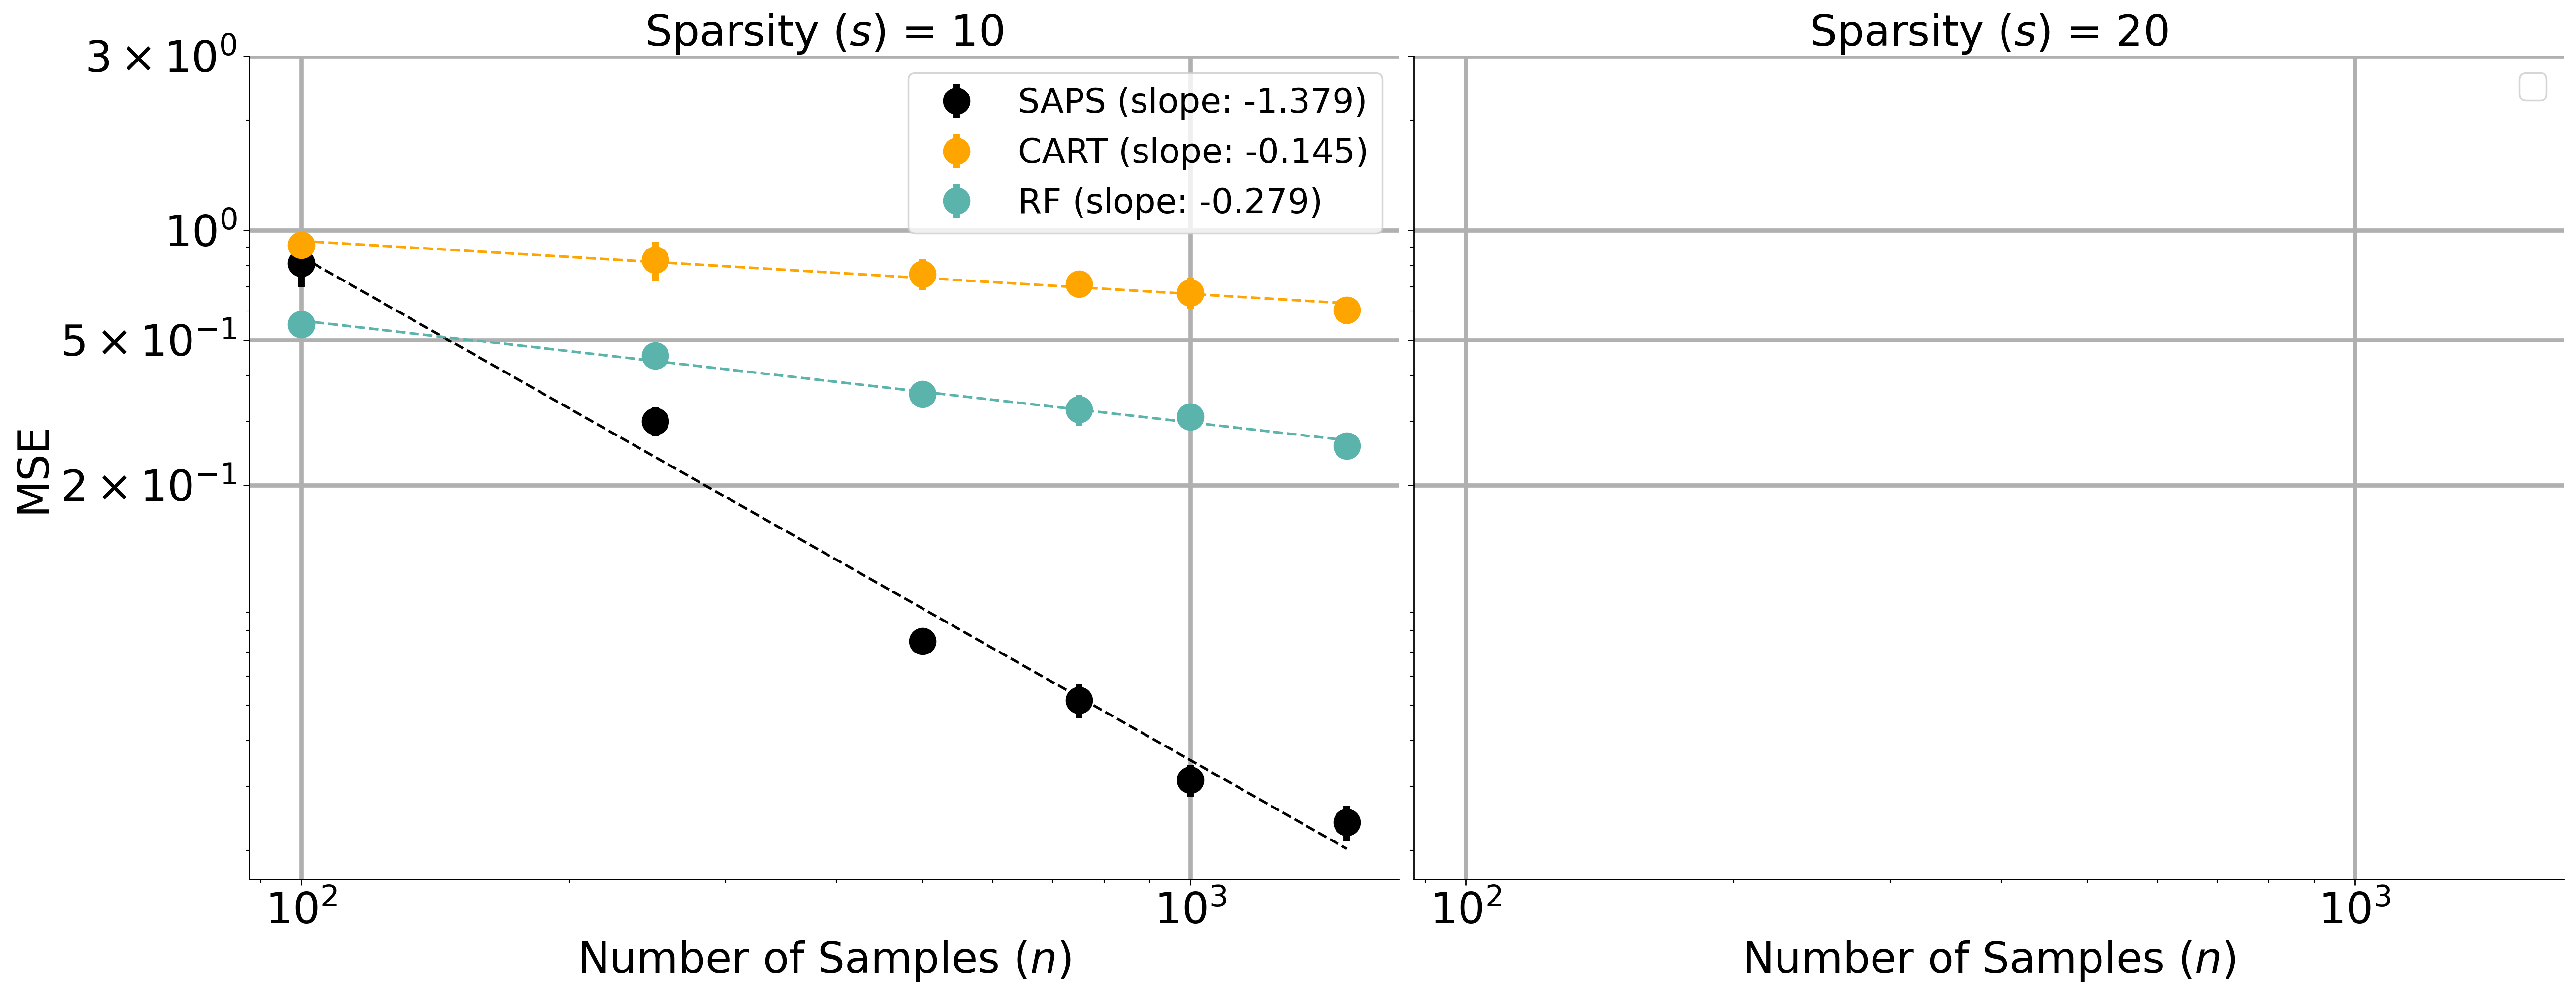

In [68]:
sum_squares_fig, axs = plt.subplots(1, 2, figsize = (20,8),sharex = True,sharey = True)

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=15, elinewidth=4)
    slope = best_fits[k][0][0]    
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)    
    axs[0].errorbar(n_train, scores[k][0], yerr=error_bar[k][0], fmt='o', label=k + f' (slope: {slope:.3f})', **kwargs)


#     slope = best_fits[k][1][0]
#     axs[1].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][1][1]), linestyle = '--', **kwargs)    
#     axs[1].errorbar(n_train, scores[k][1], yerr=error_bar[k][0], fmt='o', label=k + f' (slope: {slope:.3f})', **kwargs)



titles = ['Sparsity ($s$) = 10', 'Sparsity ($s$) = 20']
for i in range(2):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)', fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.2, 0.5, 1.0, 3.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

plt.yticks(ytick, labels)
plt.show()

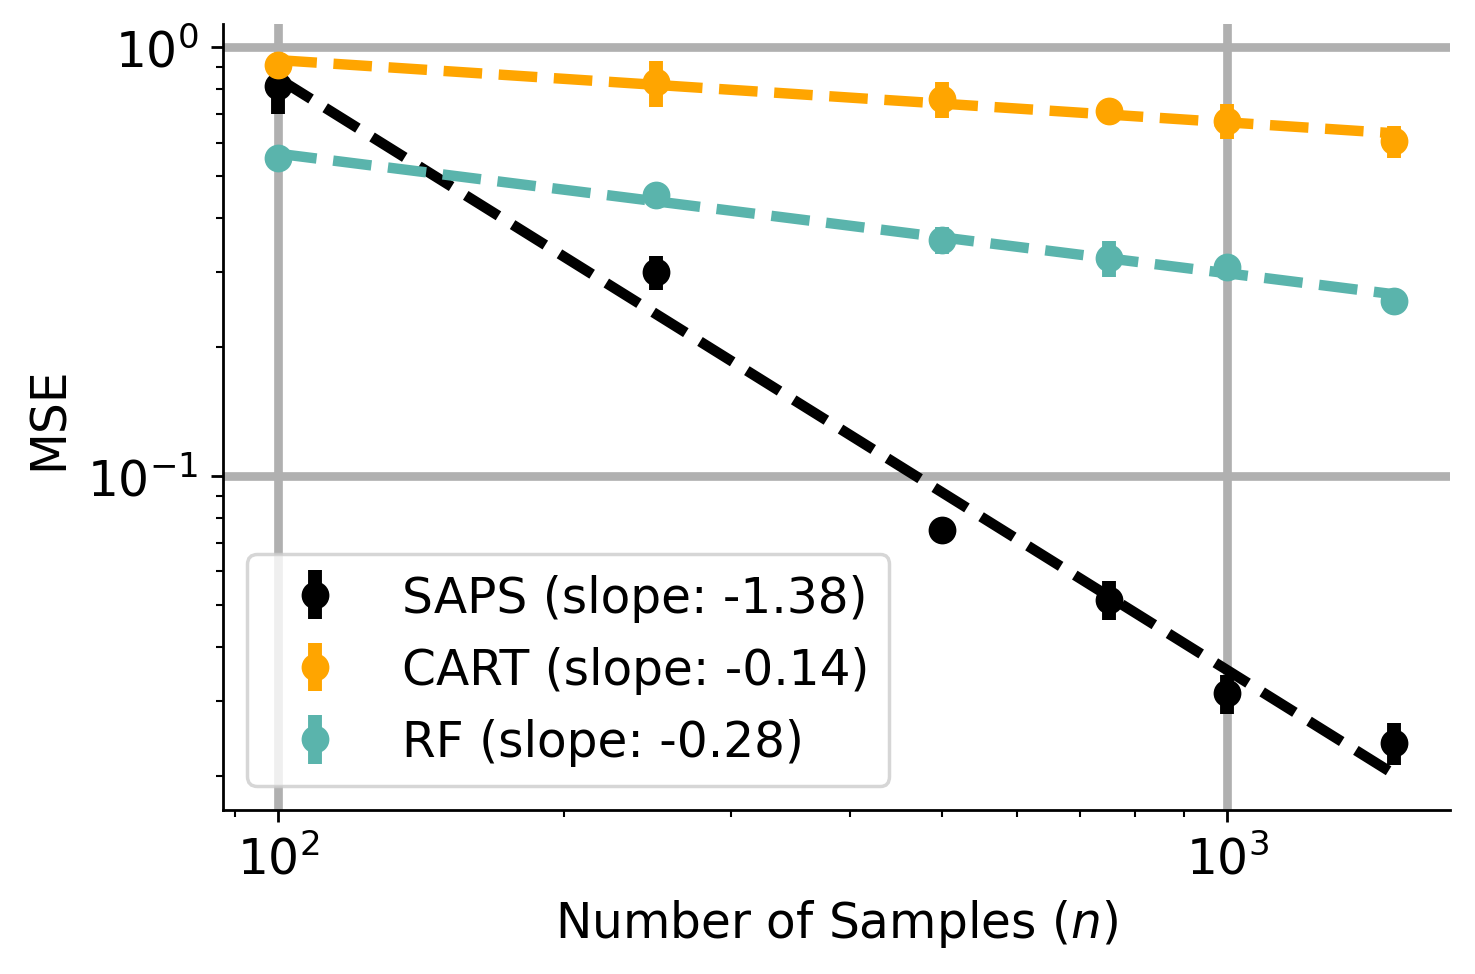

In [85]:
sum_squares_fig, axs = plt.subplots(1, 1, figsize = (6, 4),sharex = True,sharey = True)
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]    
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)    
    axs[0].errorbar(n_train, scores[k][0], yerr=error_bar[k][0], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)


titles = ['Sparsity ($s$) = 10', 'Sparsity ($s$) = 20']
for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
viz.savefig('err_rate')
plt.show()